# Introduction to Generative AI

## Imports and constants

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

## Generation vs Classification task

### Intro and data

In [17]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=RANDOM_SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

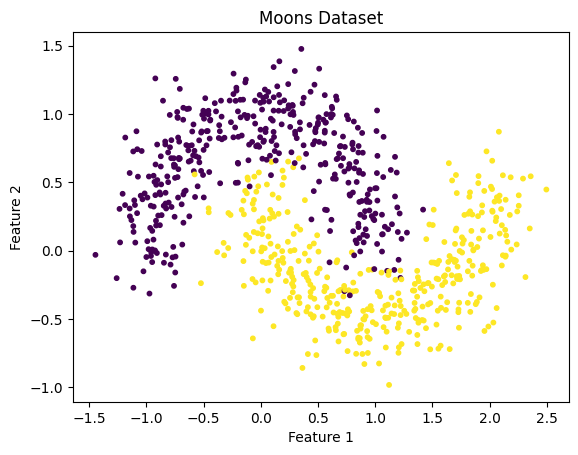

In [18]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=10, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()

**Classification task**: $P(y|x)$

**Generation task**: $P(x|y)$

### Simple classification network

In [35]:
class MoonsClassifier(nn.Module):
    def __init__(self):
        super(MoonsClassifier, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [36]:
clf = MoonsClassifier()
clf.train()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(clf.parameters(), lr=0.01)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)
num_epochs = 100

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = clf(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    clf.eval()
    with torch.no_grad():
        outputs = clf(X_test_tensor)
        test_loss = criterion(outputs, y_test_tensor)
        outputs = (outputs > 0.5).float()
        accuracy = ((outputs == y_test_tensor).sum().item()) / y_test_tensor.size(0)

    print(f'Epoch [{epoch + 1}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Accuracy: {accuracy:.4f}')


Epoch [1], Loss: 0.6851, Test Loss: 0.6776, Accuracy: 0.8650
Epoch [2], Loss: 0.6774, Test Loss: 0.6689, Accuracy: 0.8550
Epoch [3], Loss: 0.6687, Test Loss: 0.6596, Accuracy: 0.8150
Epoch [4], Loss: 0.6588, Test Loss: 0.6494, Accuracy: 0.7900
Epoch [5], Loss: 0.6480, Test Loss: 0.6383, Accuracy: 0.8100
Epoch [6], Loss: 0.6363, Test Loss: 0.6282, Accuracy: 0.8150
Epoch [7], Loss: 0.6255, Test Loss: 0.6186, Accuracy: 0.8100
Epoch [8], Loss: 0.6151, Test Loss: 0.6091, Accuracy: 0.8100
Epoch [9], Loss: 0.6048, Test Loss: 0.5989, Accuracy: 0.8050
Epoch [10], Loss: 0.5939, Test Loss: 0.5880, Accuracy: 0.8000
Epoch [11], Loss: 0.5822, Test Loss: 0.5764, Accuracy: 0.8000
Epoch [12], Loss: 0.5698, Test Loss: 0.5641, Accuracy: 0.8050
Epoch [13], Loss: 0.5566, Test Loss: 0.5512, Accuracy: 0.8000
Epoch [14], Loss: 0.5428, Test Loss: 0.5380, Accuracy: 0.7950
Epoch [15], Loss: 0.5286, Test Loss: 0.5250, Accuracy: 0.7900
Epoch [16], Loss: 0.5146, Test Loss: 0.5120, Accuracy: 0.7850
Epoch [17], Loss:

Visualize the decision boundary:

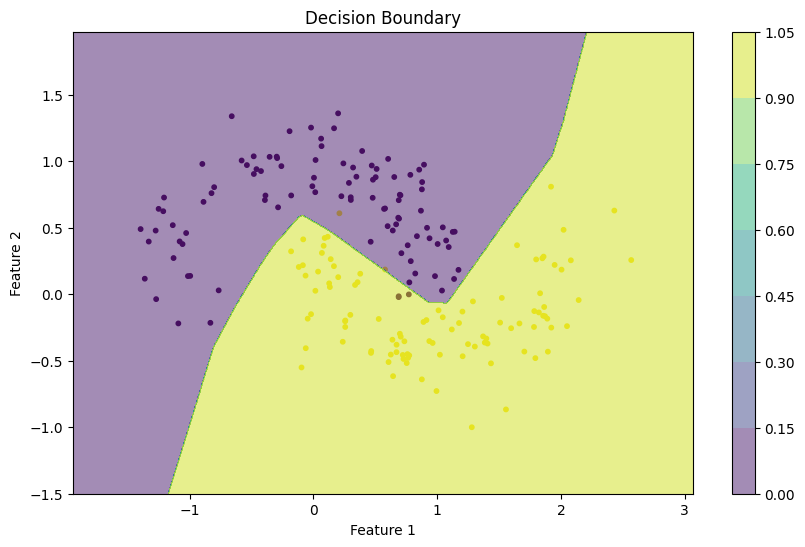

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=10, cmap='viridis')
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.005),
                     np.arange(y_min, y_max, 0.005))
with torch.no_grad():
    Z = clf(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.squeeze().numpy()
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5, cmap='viridis')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

### Simple generative network

## All generative CV methods

## Autoencoder

## Variational autoencoder (VAE)

## Diffusion

## Evaluating generative CV

## NLP